# Data processing 

Experiments gni

In [10]:
import pandas as pd
import os
from sklearn.preprocessing import minmax_scale
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [11]:
df_data = None
data_dict = {}
df_output = pd.DataFrame();

for filename in os.listdir(os.getcwd()):
    if("spreadsheet" in filename):        
        country = filename.split("-")[0]
        df_data = pd.read_csv(filename, skiprows=70,  header=None)
        df_data.pop(df_data.columns[0])
        df_data.insert(0, 'country', country)
        df_output = df_output.append(df_data)
df_output


,country,1,2,3,4,5,6,7,8,9,...,21,22,23,24,25,26,27,28,29,30
0,Switzerland,16.187656,16.175330,16.151428,16.303843,16.262805,16.252088,16.156163,16.251240,16.170997,...,16.293139,16.256602,16.173879,16.136448,16.087546,16.196544,16.095875,16.164987,16.402971,16.203217
0,Sweden,15.106428,15.142100,15.165076,15.069261,15.185531,15.169081,15.190779,15.123528,15.150897,...,15.167100,15.034224,15.166692,15.143810,15.211058,15.191243,15.126023,15.091386,15.066769,15.059008
0,Finland,13.899839,13.837298,13.811454,13.829708,13.963502,13.801843,13.853804,13.790029,13.885867,...,13.899314,13.915321,13.915629,13.890668,13.909512,13.809847,13.843748,13.921530,13.898744,13.842673
0,Singapore,12.474300,12.546001,12.552108,12.634948,12.606413,12.550046,12.493137,12.593847,12.585625,...,12.548780,12.638743,12.472752,12.587725,12.433456,12.596559,12.448612,12.388767,12.519126,12.555201
0,Germany,14.639838,14.683285,14.641457,14.723488,14.684775,14.615280,14.639971,14.752834,14.531820,...,14.633817,14.453474,14.716167,14.706439,14.644945,14.527184,14.566371,14.531191,14.607688,14.701818
0,Israel,14.958963,14.921267,14.869357,14.967785,14.919681,14.868190,14.840791,14.880274,14.967331,...,14.924249,14.983771,14.946056,14.901444,14.873366,14.970239,14.892462,14.990539,14.999233,14.942138
0,Ireland,12.170891,12.131991,12.176952,12.185538,12.184938,12.073219,12.231186,12.056243,12.046069,...,12.192758,12.072511,12.136058,12.202968,12.025798,12.139795,12.133435,12.036161,12.163261,12.182370
0,China,7.711969,7.664335,7.904351,7.838906,7.813666,7.735088,7.757129,7.733012,7.726683,...,7.899257,7.749940,7.728381,7.742429,7.737884,7.796737,7.729134,7.752146,7.660017,7.772560
0,Japan,15.325153,15.193438,15.285527,15.350470,15.342195,15.331136,15.419845,15.306062,15.464362,...,15.354177,15.184622,15.288877,15.254573,15.415323,15.318408,15.318205,15.287937,15.406320,15.483986
0,France,13.517319,13.379178,13.340274,13.454981,13.404292,13.431018,13.500371,13.463138,13.331675,...,13.348410,13.318611,13.440511,13.373129,13.400909,13.350721,13.374696,13.425241,13.435075,13.500386


In [12]:
country_gni = pd.read_excel(r'../countrygni.xlsx')
merged_df=pd.merge(df_output, country_gni, left_on="country", right_on="Country")
merged_df.pop('Country')
merged_df
#merged_df.to_excel(r'../output_experiment_gni_wn.xlsx')

,country,1,2,3,4,5,6,7,8,9,...,22,23,24,25,26,27,28,29,30,GlobInnIndex2019
0,Switzerland,16.187656,16.175330,16.151428,16.303843,16.262805,16.252088,16.156163,16.251240,16.170997,...,16.256602,16.173879,16.136448,16.087546,16.196544,16.095875,16.164987,16.402971,16.203217,67.2
1,Sweden,15.106428,15.142100,15.165076,15.069261,15.185531,15.169081,15.190779,15.123528,15.150897,...,15.034224,15.166692,15.143810,15.211058,15.191243,15.126023,15.091386,15.066769,15.059008,63.7
2,Finland,13.899839,13.837298,13.811454,13.829708,13.963502,13.801843,13.853804,13.790029,13.885867,...,13.915321,13.915629,13.890668,13.909512,13.809847,13.843748,13.921530,13.898744,13.842673,59.8
3,Singapore,12.474300,12.546001,12.552108,12.634948,12.606413,12.550046,12.493137,12.593847,12.585625,...,12.638743,12.472752,12.587725,12.433456,12.596559,12.448612,12.388767,12.519126,12.555201,58.4
4,Germany,14.639838,14.683285,14.641457,14.723488,14.684775,14.615280,14.639971,14.752834,14.531820,...,14.453474,14.716167,14.706439,14.644945,14.527184,14.566371,14.531191,14.607688,14.701818,58.2
5,Israel,14.958963,14.921267,14.869357,14.967785,14.919681,14.868190,14.840791,14.880274,14.967331,...,14.983771,14.946056,14.901444,14.873366,14.970239,14.892462,14.990539,14.999233,14.942138,57.4
6,Ireland,12.170891,12.131991,12.176952,12.185538,12.184938,12.073219,12.231186,12.056243,12.046069,...,12.072511,12.136058,12.202968,12.025798,12.139795,12.133435,12.036161,12.163261,12.182370,56.1
7,China,7.711969,7.664335,7.904351,7.838906,7.813666,7.735088,7.757129,7.733012,7.726683,...,7.749940,7.728381,7.742429,7.737884,7.796737,7.729134,7.752146,7.660017,7.772560,54.8
8,Japan,15.325153,15.193438,15.285527,15.350470,15.342195,15.331136,15.419845,15.306062,15.464362,...,15.184622,15.288877,15.254573,15.415323,15.318408,15.318205,15.287937,15.406320,15.483986,54.7
9,France,13.517319,13.379178,13.340274,13.454981,13.404292,13.431018,13.500371,13.463138,13.331675,...,13.318611,13.440511,13.373129,13.400909,13.350721,13.374696,13.425241,13.435075,13.500386,54.2


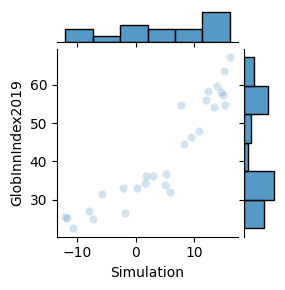

In [28]:
figure = sns.jointplot(
    data=merged_df,
    x=1,
    y='GlobInnIndex2019',
    height=3,
    alpha=0.2,
   # hue='binary_state',
    #alpha=0.6,
    #kind="hex"
    #kind="reg",
     #logx=True
)
figure.set_axis_labels('Simulation', 'GlobInnIndex2019')



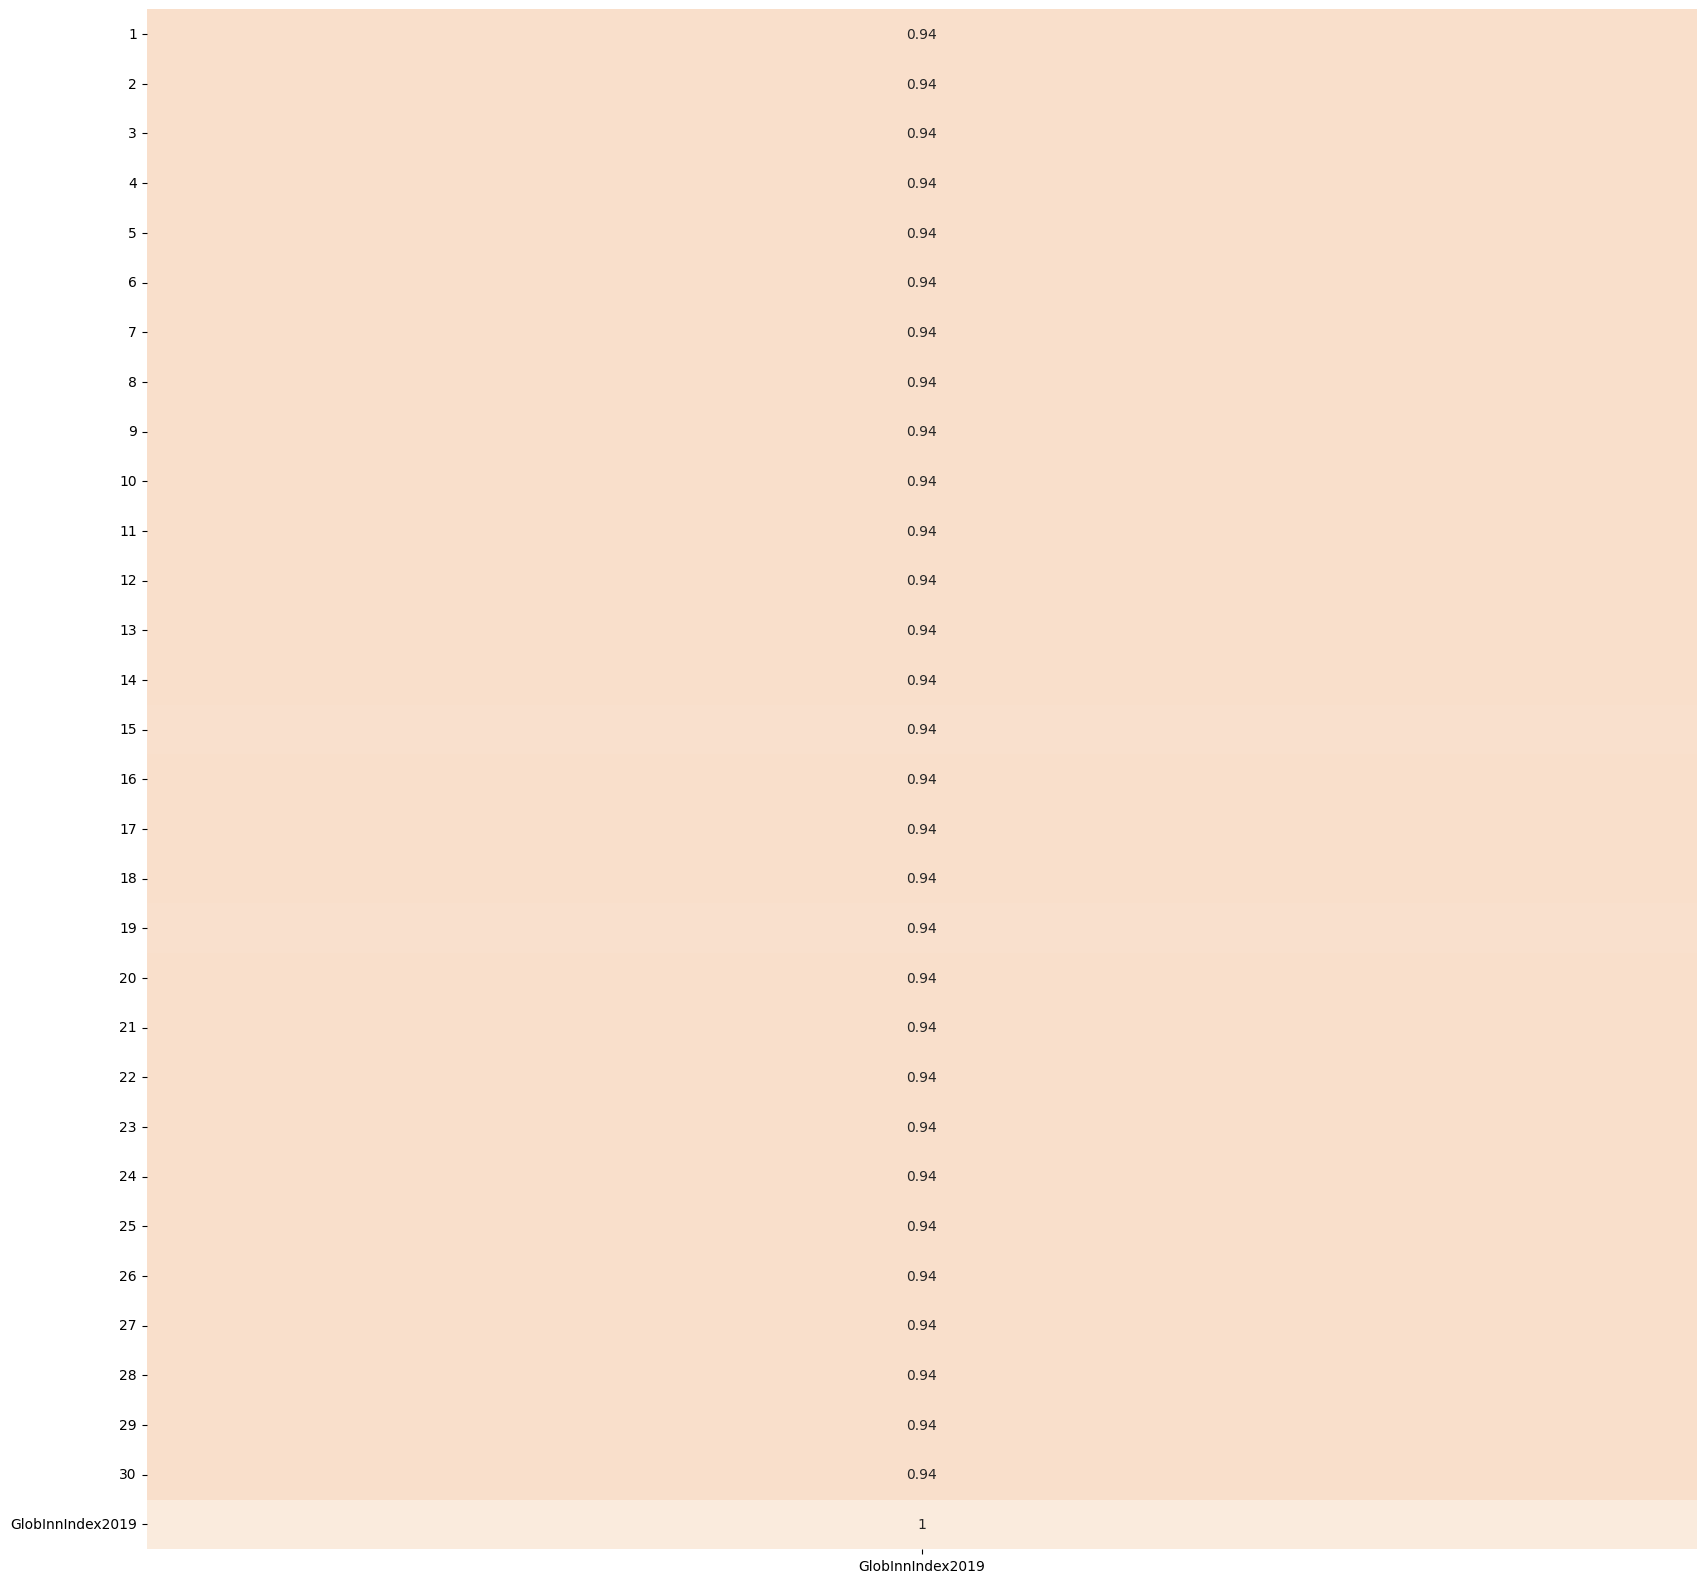

In [42]:
df_data = merged_df.loc[:, merged_df.columns != "country"];
df_data_corr = df_data.corr(method="spearman")[['GlobInnIndex2019']]

plt.figure(figsize=(20,20))
df1.head()
sns.heatmap(df_data_corr, annot=True, vmin=-1, vmax=1, cbar=False)
plt.show()


## Exports data results to excel

In [54]:
cols = df_output.select_dtypes(np.number).columns
df_output[cols] = minmax_scale(df_output[cols])

In [55]:
df_output

,country,1,2,3,4,5,6,7,8,9,...,21,22,23,24,25,26,27,28,29,30
0,Switzerland,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
0,Sweden,0.961774,0.963449,0.965008,0.956675,0.962021,0.961794,0.965807,0.960186,0.963787,...,0.960326,0.956788,0.964421,0.964834,0.968948,0.964408,0.965553,0.962011,0.953057,0.959509
0,Finland,0.919117,0.917292,0.916988,0.913176,0.918939,0.913561,0.918452,0.913108,0.918880,...,0.915658,0.917235,0.920228,0.920440,0.922838,0.915500,0.920009,0.920615,0.912023,0.916466
0,Singapore,0.868718,0.871612,0.872312,0.871249,0.871096,0.869401,0.870259,0.870877,0.872722,...,0.868074,0.872107,0.869259,0.874281,0.870545,0.872544,0.870456,0.866378,0.863555,0.870905
0,Germany,0.945278,0.947219,0.946433,0.944541,0.944367,0.942257,0.946298,0.947099,0.941811,...,0.941537,0.936259,0.948507,0.949340,0.948892,0.940897,0.945675,0.942188,0.936929,0.946869
0,Israel,0.956561,0.955637,0.954518,0.953114,0.952649,0.951179,0.953411,0.951598,0.957271,...,0.951770,0.955005,0.956628,0.956248,0.956985,0.956583,0.957257,0.958442,0.950685,0.955373
0,Ireland,0.857991,0.856967,0.859003,0.855478,0.856237,0.852579,0.860981,0.851897,0.853569,...,0.855530,0.852091,0.857365,0.860650,0.856102,0.856373,0.859261,0.853901,0.851053,0.857711
0,China,0.700351,0.698923,0.707430,0.702944,0.702130,0.699540,0.702514,0.699266,0.700234,...,0.704256,0.699286,0.701666,0.702628,0.704192,0.702608,0.702829,0.702312,0.692847,0.701658
0,Japan,0.969507,0.965266,0.969282,0.966544,0.967544,0.967511,0.973920,0.966631,0.974915,...,0.966917,0.962105,0.968738,0.968758,0.976185,0.968910,0.972379,0.968966,0.964986,0.974548
0,France,0.905593,0.901086,0.900272,0.900026,0.899225,0.900479,0.905934,0.901567,0.899207,...,0.896248,0.896141,0.903445,0.902105,0.904819,0.899245,0.903349,0.903054,0.895733,0.904353


In [72]:
country_gni = pd.read_excel(r'../countrygni.xlsx')

In [73]:
merged_df=pd.merge(df_output, country_gni, left_on="country", right_on="Country")

In [74]:
merged_df.pop('Country')
merged_df

,country,1,2,3,4,5,6,7,8,9,...,22,23,24,25,26,27,28,29,30,GlobInnIndex2019
0,Switzerland,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,67.2
1,Sweden,0.961774,0.963449,0.965008,0.956675,0.962021,0.961794,0.965807,0.960186,0.963787,...,0.956788,0.964421,0.964834,0.968948,0.964408,0.965553,0.962011,0.953057,0.959509,63.7
2,Finland,0.919117,0.917292,0.916988,0.913176,0.918939,0.913561,0.918452,0.913108,0.918880,...,0.917235,0.920228,0.920440,0.922838,0.915500,0.920009,0.920615,0.912023,0.916466,59.8
3,Singapore,0.868718,0.871612,0.872312,0.871249,0.871096,0.869401,0.870259,0.870877,0.872722,...,0.872107,0.869259,0.874281,0.870545,0.872544,0.870456,0.866378,0.863555,0.870905,58.4
4,Germany,0.945278,0.947219,0.946433,0.944541,0.944367,0.942257,0.946298,0.947099,0.941811,...,0.936259,0.948507,0.949340,0.948892,0.940897,0.945675,0.942188,0.936929,0.946869,58.2
5,Israel,0.956561,0.955637,0.954518,0.953114,0.952649,0.951179,0.953411,0.951598,0.957271,...,0.955005,0.956628,0.956248,0.956985,0.956583,0.957257,0.958442,0.950685,0.955373,57.4
6,Ireland,0.857991,0.856967,0.859003,0.855478,0.856237,0.852579,0.860981,0.851897,0.853569,...,0.852091,0.857365,0.860650,0.856102,0.856373,0.859261,0.853901,0.851053,0.857711,56.1
7,China,0.700351,0.698923,0.707430,0.702944,0.702130,0.699540,0.702514,0.699266,0.700234,...,0.699286,0.701666,0.702628,0.704192,0.702608,0.702829,0.702312,0.692847,0.701658,54.8
8,Japan,0.969507,0.965266,0.969282,0.966544,0.967544,0.967511,0.973920,0.966631,0.974915,...,0.962105,0.968738,0.968758,0.976185,0.968910,0.972379,0.968966,0.964986,0.974548,54.7
9,France,0.905593,0.901086,0.900272,0.900026,0.899225,0.900479,0.905934,0.901567,0.899207,...,0.896141,0.903445,0.902105,0.904819,0.899245,0.903349,0.903054,0.895733,0.904353,54.2


In [79]:
merged_df.to_excel(r'../output_experiment_gni.xlsx')